<a href="https://colab.research.google.com/github/khairooo/Thin-Section-Classification-Granite-VS-Basalt-/blob/main/Thin_Section_img_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thin Section Model Classifier 

*Project Outcomes*
```
- This project is considered as Combination Petrographique (microscopique) Studies and Deep learning CNN model
- I attempted to make the project legible for any Geologist, Geoscientist who wants to build a similar project probably for the thesis our any other research 
- Adding some techniques like 'Data Augmentation' to produce more Data in case where there is a limited access, or lack of Datasets 
- Simple explanation and links to some used concepts throughtout the project  
```



 ## The Dataset used: 
- As a self-paced learner earning Thin Section Datasets of Basalt and Granite was like fishing fish in the desert, which pushed me to use the known technique of [Data Augmentation](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), Where I increased the Data and started building the model, By downloading three Granite's Images and three Basalt's Images from via Google image search


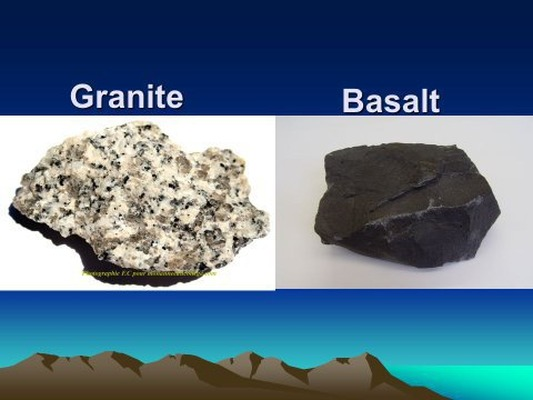

----------------------------------------------------------------------------

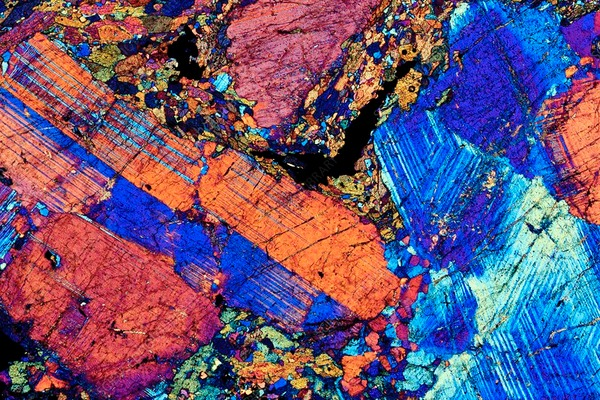

                       **Granite Under A Microscope**


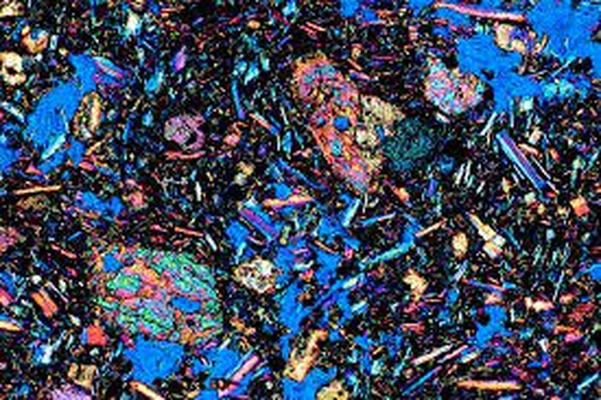

             **Basalt Under A Microscope**

In [1]:
# Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from skimage import io
from PIL import Image
%matplotlib inline
##############

from warnings import filterwarnings
filterwarnings('ignore')

## Data Augmentation 

In [2]:
"""
# Construct an instance of the ImageDataGenerator class
# Pass the augmentation parameters through the constructor. 

datagen = ImageDataGenerator(
        rotation_range=45,     #Random rotation between 0 and 45
        width_shift_range=0.2,   #% shift
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
    vertical_flip=True,
        fill_mode='constant')    #Also try nearest, constant, reflect, wrap
        
"""


"\n# Construct an instance of the ImageDataGenerator class\n# Pass the augmentation parameters through the constructor. \n\ndatagen = ImageDataGenerator(\n        rotation_range=45,     #Random rotation between 0 and 45\n        width_shift_range=0.2,   #% shift\n        height_shift_range=0.2,\n        shear_range=0.2,\n        zoom_range=0.2,\n        horizontal_flip=True, \n    vertical_flip=True,\n        fill_mode='constant')    #Also try nearest, constant, reflect, wrap\n        \n"

### Data augmentation (granite)

In [3]:
 #Multiple images.
#Manually read each image and create an array to be supplied to datagen via flow method
"""
dataset = []
# The link below was the local link where I built the dataset with Data augmentation technic 
image_directory = 'C:/Users/dell/Downloads/rocks_img/granite/'
SIZE = 255
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)


i = 0
for batch in datagen.flow(x, batch_size=16,  
                          save_to_dir='C:\\Users\\dell\\Downloads\\rocks_img\\granite', 
                          save_prefix='granite', 
                          save_format='jpg'):
    i += 1
    if i > 50:
        break
"""

"\ndataset = []\n# The link below was the local link where I built the dataset with Data augmentation technic \nimage_directory = 'C:/Users/dell/Downloads/rocks_img/granite/'\nSIZE = 255\ndataset = []\n\nmy_images = os.listdir(image_directory)\nfor i, image_name in enumerate(my_images):\n   if (image_name.split('.')[1] == 'jpg'):\n       image = io.imread(image_directory + image_name)\n       image = Image.fromarray(image, 'RGB')\n       image = image.resize((SIZE,SIZE))\n       dataset.append(np.array(image))\n\nx = np.array(dataset)\n\n\ni = 0\nfor batch in datagen.flow(x, batch_size=16,  \n                         save_to_dir='C:\\Users\\dell\\Downloads\\rocks_img\\granite', \n                         save_prefix='granite', \n                         save_format='jpg'):\n   i += 1\n   if i > 50:\n       break\n"

### Data augmentation (basalt)

In [4]:
#Multiple images.
#Manually read each image and create an array to be supplied to datagen via flow method
""""
dataset = []

# The link below was the local link where I built the dataset with Data augmentation technic 
image_directory = 'C:/Users/dell/Downloads/rocks_img/basalt/'
SIZE = 255
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))

x = np.array(dataset)


i = 0
for batch in datagen.flow(x, batch_size=16,  
                          save_to_dir='C:\\Users\\dell\\Downloads\\rocks_img\\basalt', 
                          save_prefix='basalt', 
                          save_format='jpg'):
    i += 1
    if i > 50:
        break 
        """

'"\ndataset = []\n\n# The link below was the local link where I built the dataset with Data augmentation technic \nimage_directory = \'C:/Users/dell/Downloads/rocks_img/basalt/\'\nSIZE = 255\ndataset = []\n\nmy_images = os.listdir(image_directory)\nfor i, image_name in enumerate(my_images):\n    if (image_name.split(\'.\')[1] == \'jpg\'):\n        image = io.imread(image_directory + image_name)\n        image = Image.fromarray(image, \'RGB\')\n        image = image.resize((SIZE,SIZE))\n        dataset.append(np.array(image))\n\nx = np.array(dataset)\n\n\ni = 0\nfor batch in datagen.flow(x, batch_size=16,  \n                          save_to_dir=\'C:\\Users\\dell\\Downloads\\rocks_img\\basalt\', \n                          save_prefix=\'basalt\', \n                          save_format=\'jpg\'):\n    i += 1\n    if i > 50:\n        break \n        '

In [6]:
# Loading the data from drive into Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


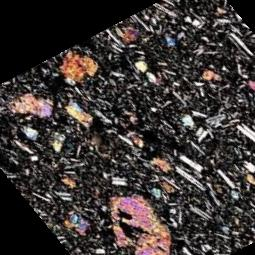

In [69]:
# Choosing image from the augmentated data and illustrate it manually using imread 
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/drive/MyDrive/rocks_img/basalt/basalt_0_2076.jpg")
cv2_imshow(img)

In [8]:
image_directory = '/content/drive/MyDrive/rocks_img/'
SIZE = 150
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all granite images and 1 to basalt.

granite_images = os.listdir(image_directory + 'granite/')
for i, image_name in enumerate(granite_images):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(image_directory + 'granite/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(0)


In [9]:

basalt_images = os.listdir(image_directory + 'basalt/')
for i, image_name in enumerate(basalt_images):
  if (image_name.split('.')[1] == 'jpg'):
    image = cv2.imread(image_directory + 'basalt/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))
    label.append(1)


In [10]:
dataset = np.array(dataset)
dataset

array([[[[ 36,  68, 131],
         [ 31,  37,  73],
         [ 81,  40,  61],
         ...,
         [111,  80,  28],
         [150, 107,  20],
         [170, 119,   2]],

        [[ 40,  42,  60],
         [ 41,  33,  49],
         [ 86,  39,  50],
         ...,
         [ 90,  88,  15],
         [148, 112,  10],
         [166, 112,   6]],

        [[120, 116,   8],
         [107, 110,   9],
         [ 99,  57,  29],
         ...,
         [109, 104,   6],
         [135, 110,   3],
         [130,  97,   5]],

        ...,

        [[202, 200,   2],
         [195, 192,   5],
         [198, 197,   4],
         ...,
         [150,  57,   5],
         [154,  58,   6],
         [158,  61,   2]],

        [[203, 202,   2],
         [195, 191,   3],
         [194, 195,   4],
         ...,
         [154,  52,  18],
         [154,  55,   9],
         [157,  61,   2]],

        [[199, 200,   2],
         [196, 193,   3],
         [191, 193,   4],
         ...,
         [154,  55,  26],
        

In [11]:
label = np.array(label)
label

array([0, 0, 0, ..., 1, 1, 1])

### Splitting the Data two train test 
- We possibly can use K-fold cross validation 

In [12]:
from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

#Without scaling (normalize) the training may not converge. 
#Normalization is a rescaling of the data from the original range 
#so that all values are within the range of 0 and 1.
from tensorflow.keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)


## Modeling 


```
# Here Where our model is created  with the number of layers, nodes, different optimisers and sigmoid activation function

```





In [13]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense


INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1)) # One node output for the last layer 
model.add(Activation('sigmoid'))  # Sigmoid is the best choice for binary classification rather than Softmax with multiclassication model 
 

model.compile(loss='binary_crossentropy', # Binary_cross entropy not RMSE or MSE 
              optimizer='rmsprop',             #also try adam, Adagrad SGD 
              metrics=['accuracy'])

print(model.summary())    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [71]:
# Install a supplement library to visualize the model created (optinal)
#! pip install ann_visualizer

In [73]:
"""Supposed we add the previous option of ann_visualizer So how should the architecture looks like 
# from ann_visualizer.visualize import ann_viz
# ann_viz(model, title="My first neural network")"""

'Supposed we add the previous option of ann_visualizer So how should the architecture looks like \n# from ann_visualizer.visualize import ann_viz\n# ann_viz(model, title="My first neural network")'

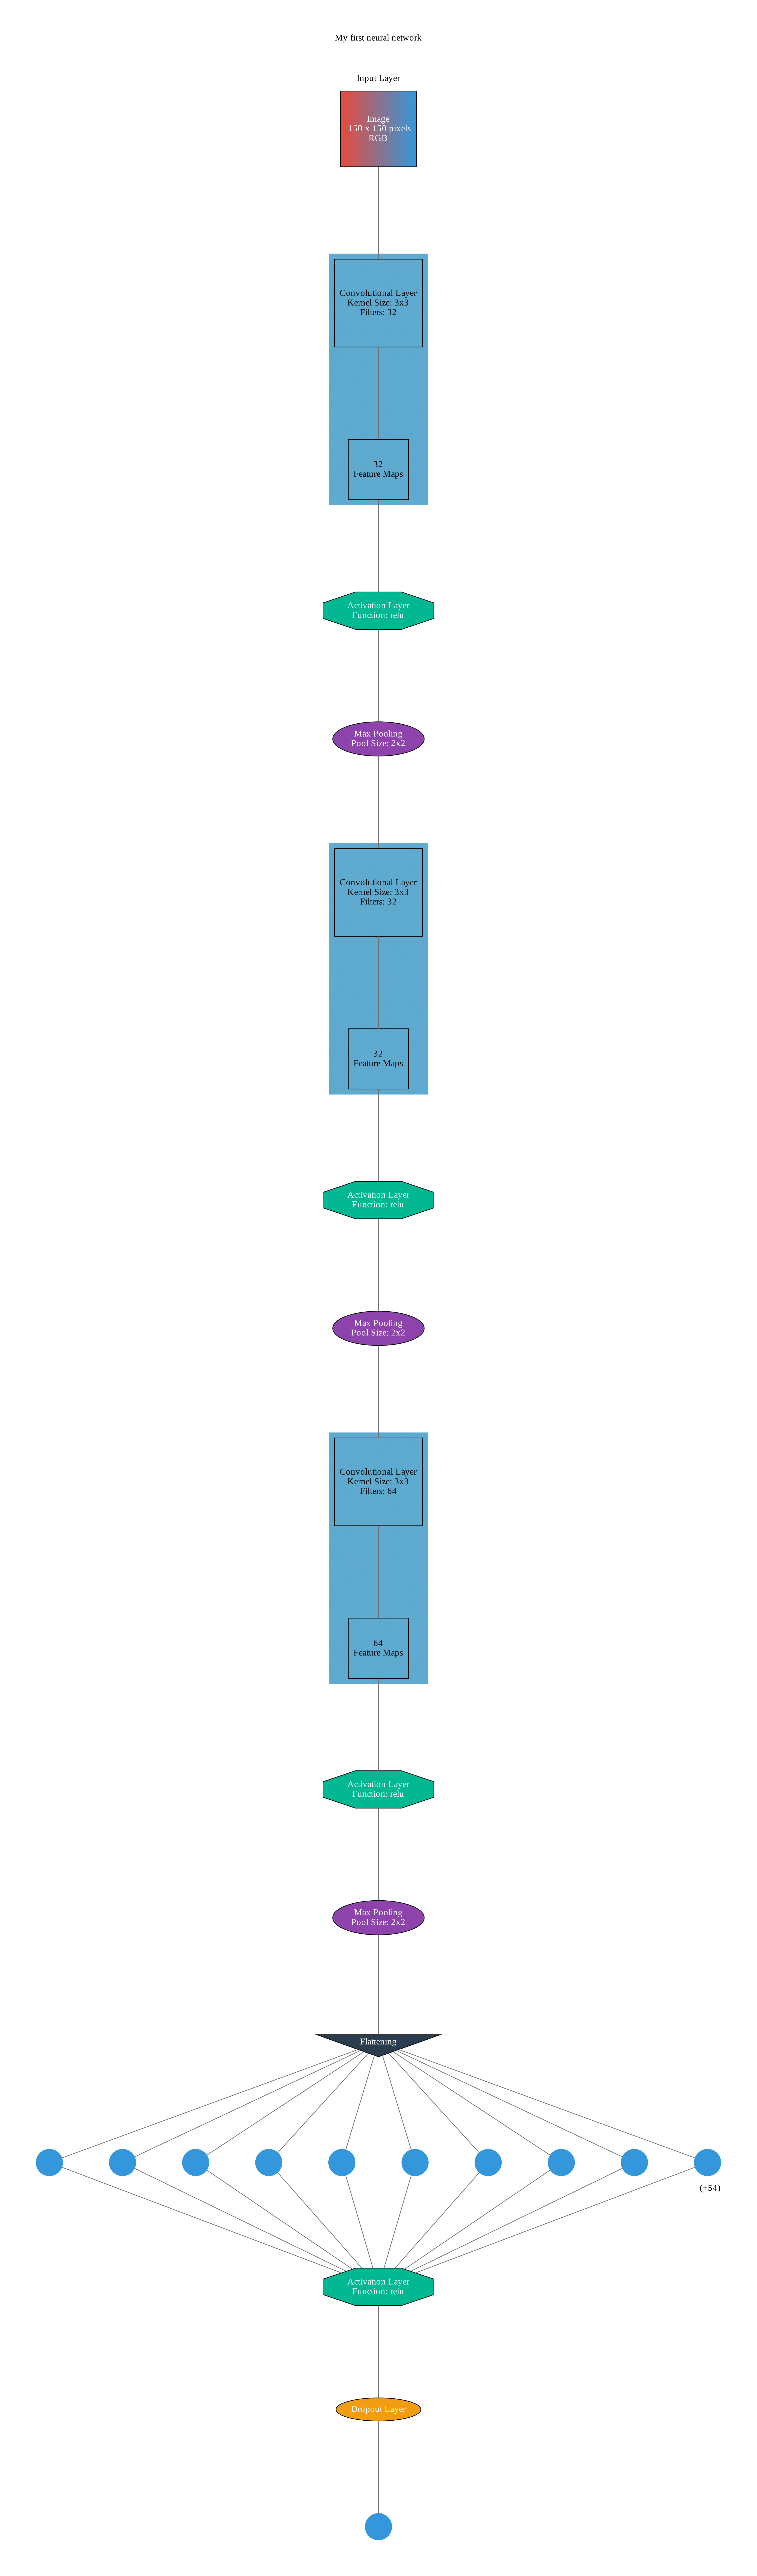

In [16]:
# Let's fit the model with only 10 epochs 
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10,   # We are able to change the nnumber of epochs (try 15,100,300)  
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model.save('granite_basalt_cl.h5')  

Epoch 1/10
14/14 [==============================] - 33s 2s/step - loss: 0.4589 - accuracy: 0.8499 - val_loss: 0.2141 - val_accuracy: 0.8514
Epoch 2/10
14/14 [==============================] - 31s 2s/step - loss: 0.2446 - accuracy: 0.8578 - val_loss: 0.1225 - val_accuracy: 0.9595
Epoch 3/10
14/14 [==============================] - 24s 2s/step - loss: 0.0902 - accuracy: 0.9718 - val_loss: 0.0732 - val_accuracy: 0.9640
Epoch 4/10
14/14 [==============================] - 25s 2s/step - loss: 0.1068 - accuracy: 0.9707 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 24s 2s/step - loss: 0.0281 - accuracy: 0.9955 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 26s 2s/step - loss: 0.3483 - accuracy: 0.9187 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.0216 - accuracy: 0.9944 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 8/10
14/14 [==

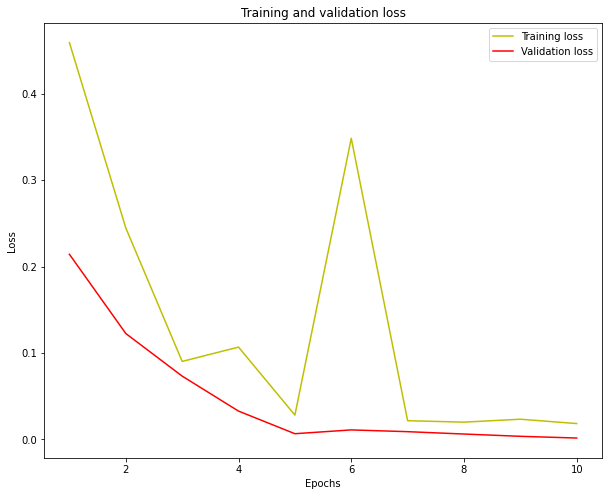

In [17]:
#plot the training and validation accuracy and loss at each epoch
plt.figure(figsize= (10,8))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

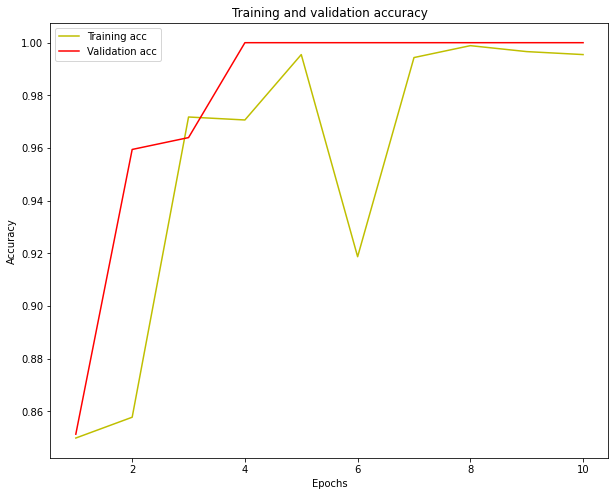

In [18]:
plt.figure(figsize= (10,8))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The prediction for this image is:  [[8.52517e-18]]
The actual label for this image is: Granite


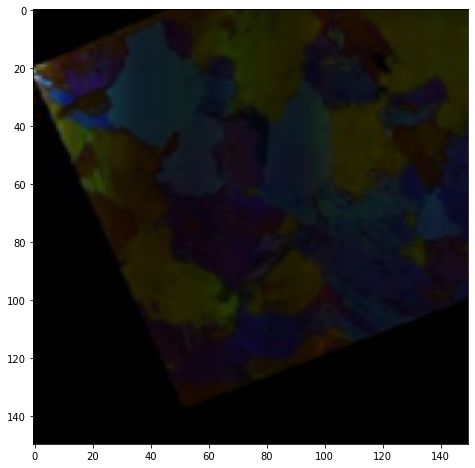

In [47]:
n=24 #Select the index of image to be loaded for testing (try for instance : 24, 50, 100)
plt.figure(figsize = (10,8))
img = X_test[n]
plt.imshow(img)

input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
pred = y_test[n]
if pred == 0:
  print("The actual label for this image is: Granite")
else:
  print("The actual label for this image is: Basalt")

In [36]:
#We can load the trained model, so we don't have to train again for the same number of epochs (10 in our case)!
from keras.models import load_model
# load model
model = load_model('granite_basalt_cl.h5')

#For 10 epochs, giving 100.0% accuracy wow Amazing!!! ^^

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

7/7 [==============================] - 3s 459ms/step - loss: 0.0016 - accuracy: 1.0000
Accuracy =  100.0 %


## Confusing Matrix and ROC AUC 



- One of the most important steps in any machine learning and deep learning classification model is the threshold of the classifier, in this case we should be aware about how to choose the optimal threshold option.



Read more about [Confusing Matrix](https://machinelearningmastery.com/confusion-matrix-machine-learning/#:~:text=A%20confusion%20matrix%20is%20a,two%20classes%20in%20your%20dataset.) 

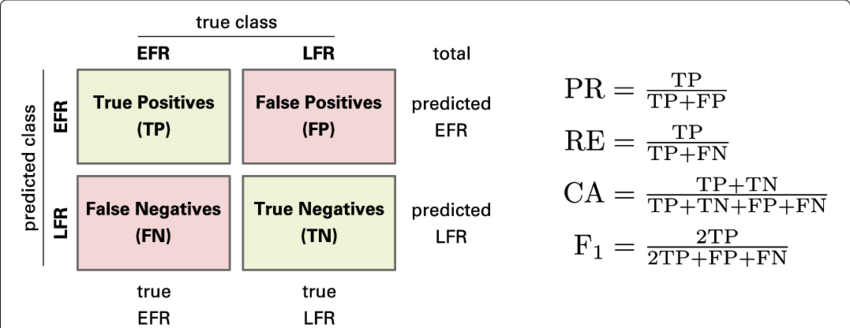

# ROC AND AUC : 
- As second step after creating an example of confusing matrtix we need more confusing matrices with different thresholds, In that case understanding ROC and UAC is mandantory.


- Read More about [ROC and AUC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

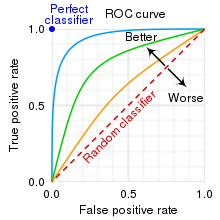!

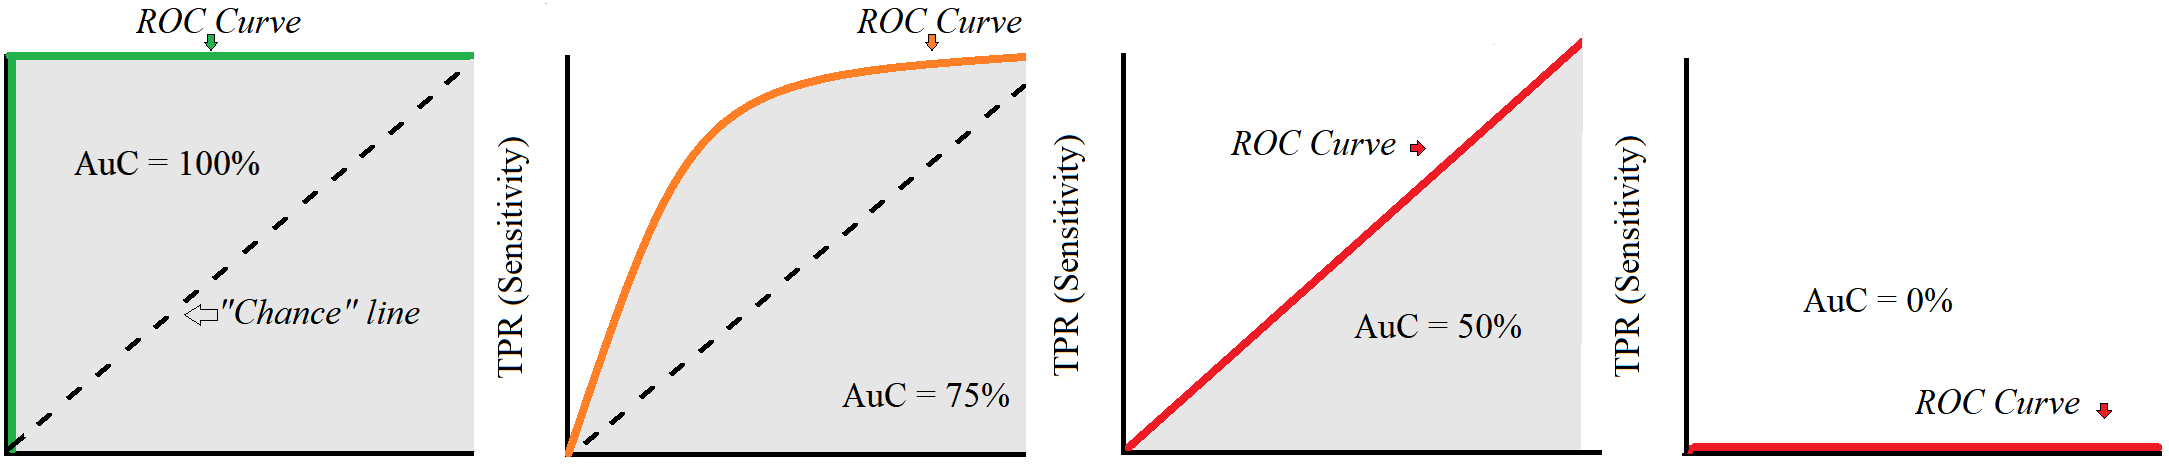

In [56]:
#Confusion matrix
#We compare labels and plot them based on correct or wrong predictions.
#Since sigmoid outputs probabilities we need to apply threshold to convert to label.

mythreshold=0.976683
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)


[[189   0]
 [  0  33]]


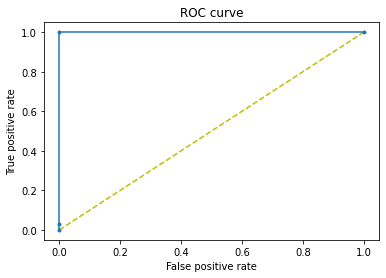

In [57]:
#Check the confusion matrix for various thresholds. Which one is good?
#Need to balance positive, negative, false positive and false negative. 
#ROC can help identify the right threshold.
##################################################################
"""
Receiver Operating Characteristic (ROC) Curve is a plot that helps us 
visualize the performance of a binary classifier when the threshold is varied. 
"""
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [58]:
"""
#One way to find the best threshold once we calculate the true positive 
and false positive rates is ...
The optimal cut off point would be where “true positive rate” is high 
and the “false positive rate” is low. 
Based on this logic let us find the threshold where tpr-(1-fpr) is zero (or close to 0)
"""
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  2    0.976683
Name: thresholds, dtype: float32


In [59]:
#Now use this threshold value in the confusion matrix to visualize the balance
#between tp, fp, fp, and fn


#AUC
#Area under the curve (AUC) for ROC plot can be used to understand hpw well a classifier 
#is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)


#########################################

Area under curve, AUC =  1.0


In [74]:
import time
time.time()

1641074071.0276175

# Next Step : Building our Granite VS Basalt Classifier GUI:

################ DONE ##############